In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
d_cols=['user id','item id', 'rating','timestamp']
data=pd.read_csv('/content/u.data',names=d_cols, delimiter= "\t" )
data.fillna('0')

i_cols=['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

item=pd.read_csv('/content/u.item',names=i_cols, delimiter= "|" ,encoding='latin-1',on_bad_lines='skip')
item.fillna('0',inplace= True)


u_cols=['user_id', 'age', 'sex', 'occupation', 'zip_code']
user=pd.read_csv('/content/u.user',names=u_cols, delimiter= "|")
user.fillna('0')

ratings=pd.read_csv('ratings.csv')
ratings.fillna('0')

#pd.read_csv('test.csv', on_bad_lines='skip')
#pd.read_csv('test.csv', on_bad_lines='warn')
#pd.read_csv('test.csv', delimiter='\t', lineterminator='\r\n')
#pd.read_csv('test.csv', engine='python')
#pd.read_csv('test.csv', header=None)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [ ]:
data.head(2)

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742


In [ ]:
user.head(2)

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043


In [ ]:
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179


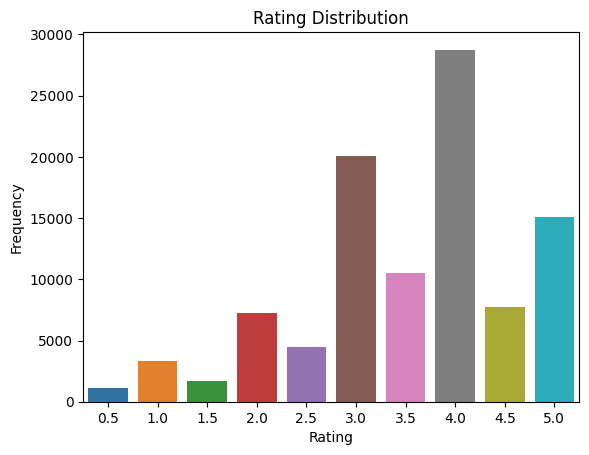

In [ ]:
#Display univariate plots of the attributes: 'rating'
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(data=ratings, x='rating')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")

plt.show()

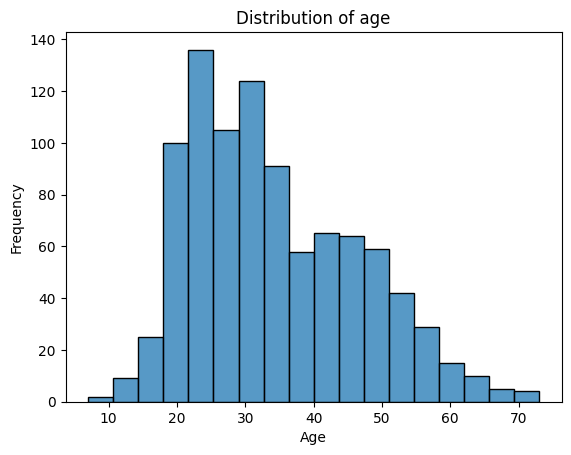

In [ ]:
#Display univariate plots of the attributes: 'age'

sns.histplot(data=user,x='age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of age')
plt.show()

In [ ]:
item.head(2)

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


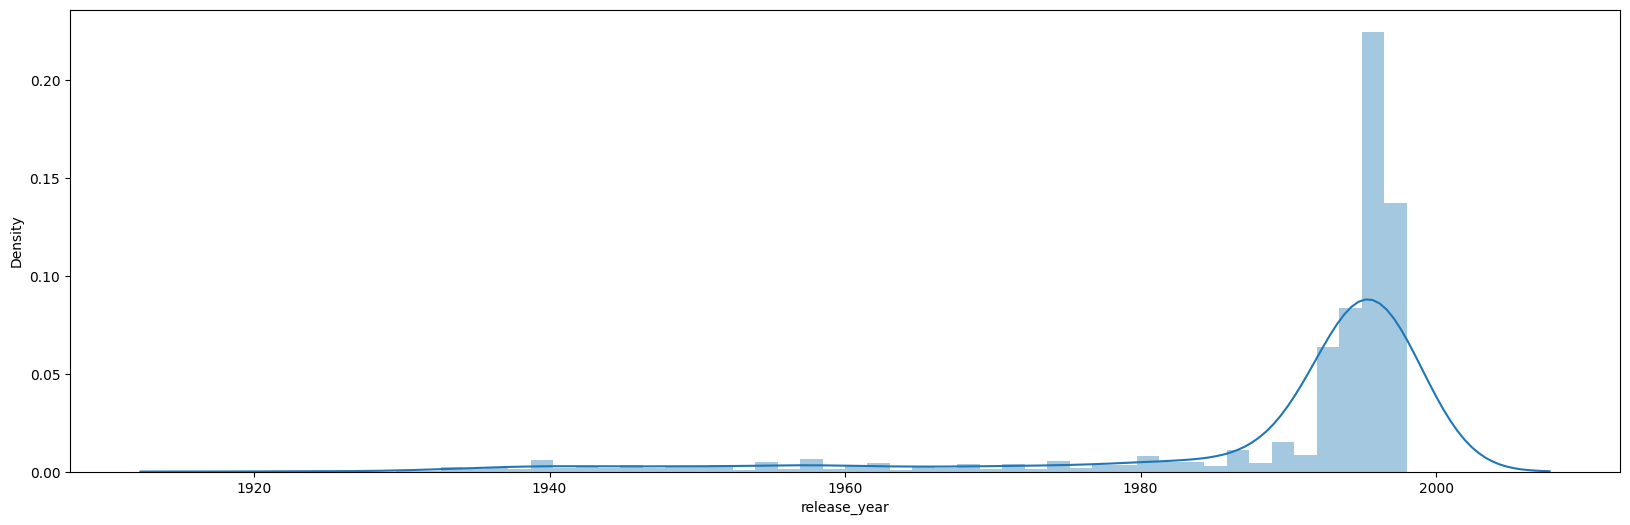

In [ ]:
# Distribution of movies w.r.t release year
item['release_year'] = item['release date'].str.split('-', expand = True)[2]  #seperating out the year from the date
#item['release_year'] = item.release_year.astype(int)  # changing the type to int
plt.figure(figsize=(20,6))    #increasing the figure size
sns.distplot(item.release_year)
plt.show()

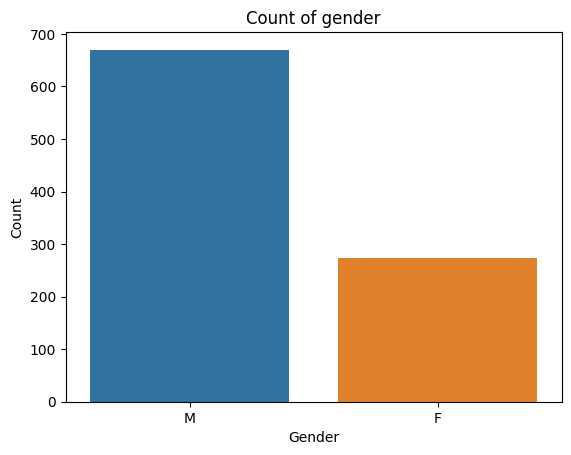

In [ ]:
#Display univariate plots of the attributes: 'gender'
sns.countplot(data=user,x='sex')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of gender')
plt.show()


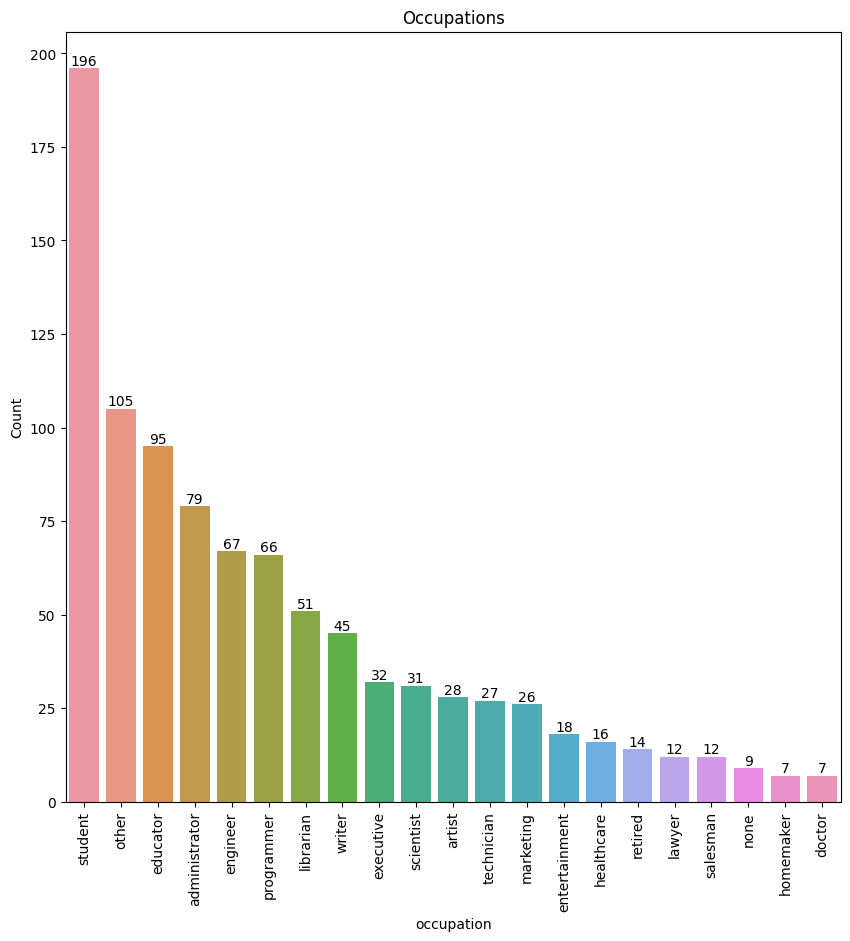

In [ ]:
#Display univariate plots of the attributes: 'occupation'
plt.figure(figsize=(10,10))
#print(user['occupation'].value_counts())
y=user['occupation'].value_counts().values.tolist()
x=user['occupation'].value_counts().index.tolist()
sns.countplot(x='occupation',data=user,order=x)
#plt.xlabel('Occupation')
plt.ylabel('Count')

plt.xticks(rotation=90)
plt.title('Occupations')
#print(list(enumerate((zip(x, y)))))
for i,(label,count)in list(enumerate((zip(x, y)))):
  height=count
  plt.text(i,height,
                str(count),
                ha='center', va='bottom')


plt.show()

In [ ]:
item.head(2)

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,1,Toy Story (1995),01-Jan-1995,0,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye (1995),01-Jan-1995,0,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1995


In [ ]:
data.head(1)

,user id,item id,rating,timestamp
0,196,242,3,881250949


In [ ]:
user.head(1)

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711


In [ ]:
#Display the top 25 movies by average rating, as a list/series/dataframe.
#Note:- Consider only the movies which received atleast a 100 ratings
final= pd.merge(left = ratings,
                          right = item,
                          left_on='movieId',right_on='movie id',
                         how='inner' )
temp1=final.groupby(['movie id'])['rating'].count().reset_index()
temp1
temp2=final.groupby(['movie id'])['rating'].mean().reset_index()
temp2
final1=temp1.merge(temp2,on='movie id')
f=final1[final1['rating_x']>100]
f.sort_values(by='rating_y', ascending= False).head(25)
f.rename(columns={'rating_x':'Total_rating','rating_y':'avg_rating'},inplace=True)
f


#temp1 = final.groupby(['movie id']).agg({'rating': 'count'}).reset_index()
#final1=temp1.merge(temp2,on='movie id',columns=[Count,Mean])
#final1
#final1.rename(columns={'rating_x':'Total_rating','rating_y':'avg_rating'},inplace=True)
#final1 = final1[~(final1['Total_rating'] < 100)]
#final1.sort_values(by='avg_rating',ascending=False).head(25)

,movie id,Total_rating,avg_rating
0,1,247,3.872470
1,2,107,3.401869
5,6,104,3.884615
9,10,122,3.450820
24,25,101,3.742574
...,...,...,...
1219,1517,107,3.378505
1224,1527,118,3.677966
1253,1580,190,3.663158
1288,1617,125,4.120000


In [ ]:

# Verify the following statements (no need of doing a statistical test. Compare absolute numbers):
# Men watch more drama than women

table=pd.merge(left= user,right=ratings,left_on='user_id',right_on='userId',how='right')
table
final=pd.merge(left=item, right=table,left_on=['movie id'],right_on=['movieId'],how='right')
final
drama=final.groupby(['sex'])['Drama'].value_counts()
drama


sex  Drama
F    0.0       5918
     1.0       4110
M    0.0      17636
     1.0      12165
Name: Drama, dtype: int64

In [ ]:
# Verify the following statements (no need of doing a statistical test. Compare absolute numbers):
#Men watch more Romance than women
#


men_data = final[final['sex'] == 'M']
women_data = final[final['sex'] == 'F']

# Find the number of Romance movies watched by men and women
men_romance_count = men_data[men_data['Romance'] == 1]['user_id'].count()
women_romance_count = women_data[women_data['Romance'] == 1]['user_id'].count()

# Compare the absolute numbers
if men_romance_count > women_romance_count:
    print("Men watch more Romance movies than women.",men_romance_count)
else:
    print("Women watch more Romance movies than men.",women_romance_count)

Men watch more Romance movies than women. 4215


In [ ]:
# Verify the following statements (no need of doing a statistical test. Compare absolute numbers):
#Women watch more Sci-Fi than men
scifi=final.groupby(['sex'])['Sci-Fi'].value_counts()
scifi

sex  Sci-Fi
F    0.0        9223
     1.0         805
M    0.0       27531
     1.0        2270
Name: Sci-Fi, dtype: int64

In [ ]:
item.head(1)

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,1,Toy Story (1995),01-Jan-1995,0,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1995


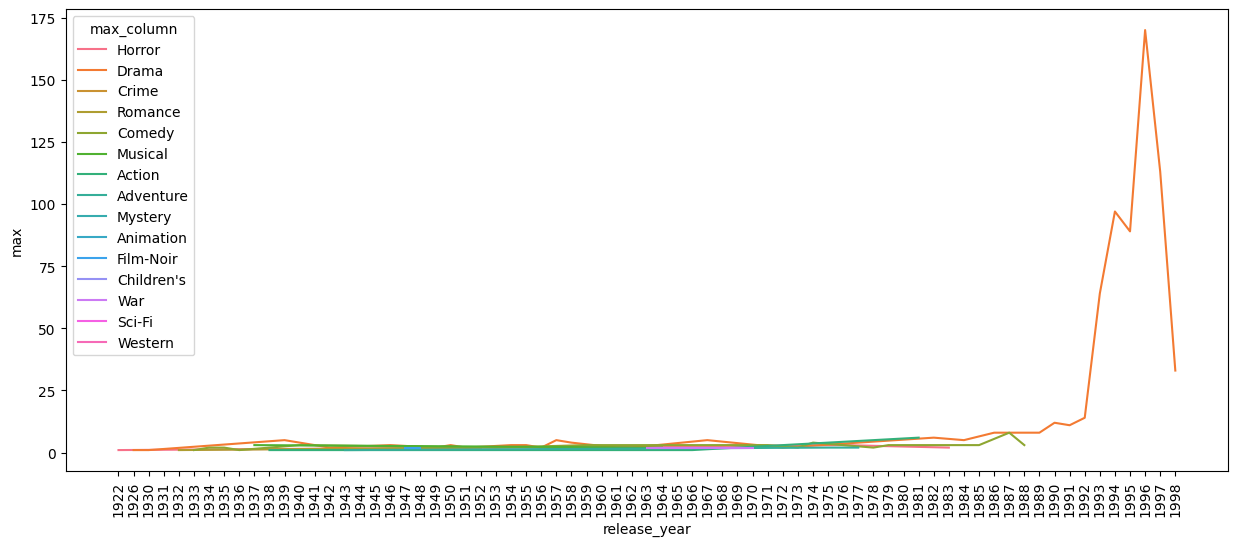

In [ ]:
'''Visualize how popularity of Genres has changed over the years. From the graph one should be able to
see for any given year, movies of which genre got released the most.'''

df = item.groupby("release_year").agg({'unknown': 'sum',
    'Action': 'sum',
    'Adventure': 'sum',
    'Animation': 'sum',
    "Children's": 'sum',
    'Comedy': 'sum',
    'Crime': 'sum',
    'Documentary': 'sum',
    'Drama': 'sum',
    'Fantasy': 'sum',
    'Film-Noir': 'sum',
    'Horror': 'sum',
    'Musical': 'sum',
    'Mystery': 'sum',
    'Romance': 'sum',
    'Sci-Fi': 'sum',
    'Thriller': 'sum',
    'War': 'sum',
    'Western': 'sum'})
df['max']=df.max(axis=1)
df['max_column'] = df.idxmax(axis=1)
plt.figure(figsize=(15, 6))
sns.lineplot(x='release_year',y='max',data=df,hue='max_column')
plt.xticks(rotation=90)
plt.show()


#pivot_table = df.pivot(index='release year', columns='max_column', values='max_value')
#sns.barplot(x='release',y='max',data=df,hue='max_column')
#sns.histplot(df['max_column'])
#sns.heatmap(df)